# Creating Plots

This code is run after we collect our data, in order to examine our data and retrieve information from the generated plots.<br><br> After connecting to our database where all of the collected data is stored, we initiate the function __sentiment_insights__ where the processing of the data is made.
<br> Afterwards, using the returned data of the function, we generate the plots



# Install Libraries  (if necessary)

In [263]:
# !pip install wordcloud

# Import Libraries

In [264]:
import mysql.connector

from wordcloud import WordCloud, STOPWORDS
import pandas as pd
import numpy as np
import nltk
import matplotlib.pyplot as plt

### Connect to MySQL

In [265]:
conn = mysql.connector.connect(host='localhost', database='TwitterAnalysis', user='root', password='')
if db.is_connected():
    print("CONNECTED TO MYSQL DATABASE! \n.\n.\n.\n.")

CONNECTED TO MYSQL DATABASE! 
.
.
.
.


## Getting our data  to right form before creating plots

In [266]:
# Function for creating Dataframes of our data

def df_gen(q):
    cursor = conn.cursor()
    cursor.execute(q)
    data = cursor.fetchall()
    
    # store query on a dataframe
    df = pd.DataFrame(data, columns=['SENTIMENT', 'TWEET_TEXT', 'FOLLOWERS', 'HASHTAGS'])
    return df

### Create Dataframes from our data

In [267]:
# Whole table as a Dataframe, taking into account only the columns we will use in our plots
df_total = df_gen(
    "SELECT SENTIMENT, TWEET_TEXT, FOLLOWERS, HASHTAGS FROM `twitteranalysis`.tweetstorage;")

# Dataframe for hashtags referring to LiverpoolFC
df_Liverpool = df_gen(
    "SELECT SENTIMENT, TWEET_TEXT, FOLLOWERS, HASHTAGS FROM `twitteranalysis`.tweetstorage WHERE HASHTAGS LIKE '%LiverpoolFC%';")

# Dataframe for hashtags referring to ManUtd
df_ManUtd = df_gen(
    "SELECT SENTIMENT, TWEET_TEXT, FOLLOWERS, HASHTAGS FROM `twitteranalysis`.tweetstorage WHERE HASHTAGS LIKE '%ManUtd%';")

# Dataframe for hashtags referring to ManCity
df_ManCity = df_gen(
    "SELECT SENTIMENT, TWEET_TEXT, FOLLOWERS, HASHTAGS FROM `twitteranalysis`.tweetstorage WHERE HASHTAGS LIKE '%ManCity%';")


### Function for seperating the user's sentiment

In [268]:
# Function to split the sentiment of the tweets both as a whole and by people
# with "high influence" (users with >=5000 followers)

def sentiment_insights(table):
    total_pos = 0
    total_neg = 0
    total_neutr = 0
    
    high_pos = 0
    high_neg = 0
    high_neutr = 0
    
    for i in range(0, len(table['SENTIMENT'])):
        
        if table['SENTIMENT'][i] == 'Positive':
            total_pos += 1
        elif table['SENTIMENT'][i] == 'Negative':
            total_neg += 1
        else:
            total_neutr += 1
    

    
        # "High Influence" users
        
        if table['FOLLOWERS'][i] >= 5000:
            if table['SENTIMENT'][i] == 'Positive':
                high_pos += 1
            elif table['SENTIMENT'][i] == 'Negative':
                high_neg += 1
            else:
                high_neutr += 1
                
    
    
    sum_all = total_pos + total_neg + total_neutr
    sum_high = high_pos + high_neg + high_neutr
    
    pos_percent = total_pos / sum_all
    neg_percent = total_neg / sum_all
    neutr_percent = total_neutr / sum_all
    
    high_pos_percent = high_pos / sum_high
    high_neg_percent= high_neg / sum_high
    high_neutr_percent = high_neutr / sum_high
    
    return pos_percent, neg_percent, neutr_percent, high_pos_percent, high_neg_percent, high_neutr_percent
    
                
    

# Creating Plots

### Pie Chart Plots

In [269]:
# Pie Chart of the whole dataset's Polarity

def total_pie():
    labels = 'Positive', 'Negative', 'Neutral'
    sizes = [sentiment_insights(df_total)[0],sentiment_insights(df_total)[1],sentiment_insights(df_total)[2]]
    explode = (0.1,0,0)

    fig1, ax1 = plt.subplots()
    ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',shadow=True, startangle=90)
    ax1.axis('equal')
    plt.title("General Polarity of the whole dataset", fontweight='bold')
    plt.show()

In [270]:
# Pie Chart of Liverpool tweets Polarity

def Liverpool_pie():
    labels = 'Positive', 'Negative', 'Neutral'
    sizes = [sentiment_insights(df_Liverpool)[0],sentiment_insights(df_Liverpool)[1],sentiment_insights(df_Liverpool)[2]]
    explode = (0.1,0,0)

    fig1, ax1 = plt.subplots()
    ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',shadow=True, startangle=90)
    ax1.axis('equal')
    plt.title("Polarity of Liverpool Tweets ", fontweight='bold')
    plt.show()

In [271]:
# Pie Chart of Manchester United tweets Polarity

def ManUtd_pie():
    labels = 'Positive', 'Negative', 'Neutral'
    sizes = [sentiment_insights(df_ManUtd)[0],sentiment_insights(df_ManUtd)[1],sentiment_insights(df_ManUtd)[2]]
    explode = (0.1,0,0)

    fig1, ax1 = plt.subplots()
    ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',shadow=True, startangle=90)
    ax1.axis('equal')
    plt.title("Polarity of Manchester United Tweets ", fontweight='bold')
    plt.show()

In [272]:
# Pie Chart of Manchester City tweets Polarity


def ManCity_pie():
    labels = 'Positive', 'Negative', 'Neutral'
    sizes = [sentiment_insights(df_ManCity)[0],sentiment_insights(df_ManCity)[1],sentiment_insights(df_ManCity)[2]]
    explode = (0.1,0,0)

    fig1, ax1 = plt.subplots()
    ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',shadow=True, startangle=90)
    ax1.axis('equal')
    plt.title("Polarity of Manchester City Tweets ", fontweight='bold')
    plt.show()

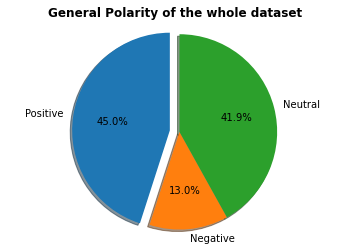

In [273]:
# Execute the total_pie function
total_pie()

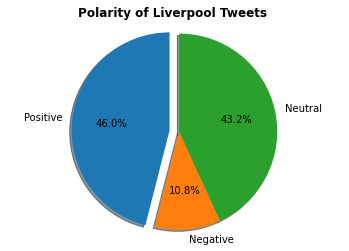

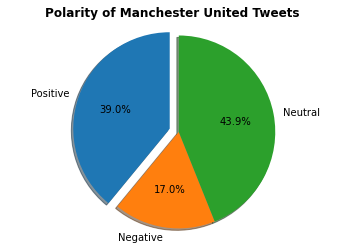

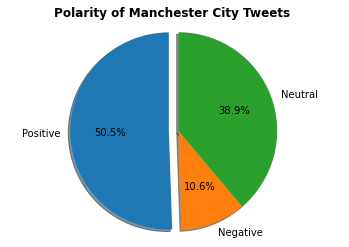

In [274]:
# Execute the individual team's function
Liverpool_pie(),ManUtd_pie(),ManCity_pie()
plt.show()

### Stacked Bar Chart for "High Influence" users 

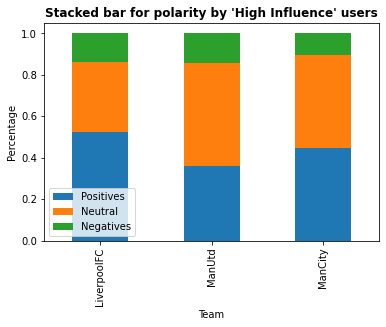

In [275]:
# Creating Stacked bar plot about the polarities for each gaming console from accounts
# with more than 5000 followers.

plot_high = pd.DataFrame({
    "Positives": [sentiment_insights(df_Liverpool)[3], sentiment_insights(df_ManUtd)[3], sentiment_insights(df_ManCity)[3]],
    "Neutral": [sentiment_insights(df_Liverpool)[5], sentiment_insights(df_ManUtd)[5], sentiment_insights(df_ManCity)[5]],
    "Negatives": [sentiment_insights(df_Liverpool)[4], sentiment_insights(df_ManUtd)[4], sentiment_insights(df_ManCity)[4]],
}, index=["LiverpoolFC", "ManUtd", "ManCity"]
)

plot_high .plot(kind='bar', stacked=True)
plt.title("Stacked bar for polarity by 'High Influence' users", fontweight='bold')
plt.xlabel("Team")
plt.ylabel("Percentage")
plt.show()

### Word Cloud

Word Cloud is a data visualization technique used for representing text data in which the size of each word indicates its __frequency or importance__. <br>Significant textual data points can be highlighted using a word cloud. Word clouds are widely __used for analyzing data from social network websites.__

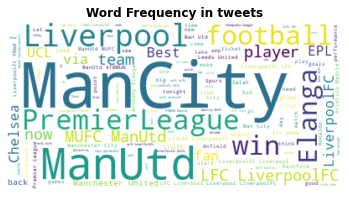

In [293]:
# include the wordcloud's stopwords from appearing on the graph
stopwords = list(STOPWORDS)

# include some more stopwords found in our particular case that provide no information
stopwords.append('will')
stopwords.append('game')
stopwords.append('goal')
stopwords.append('S')
text_pool = " ".join(df_total['TWEET_TEXT'])
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text_pool)


# Display the generated image:

plt.title('Word Frequency in tweets', fontweight='bold')
plt.axis("off")
plt.imshow(wordcloud, interpolation='bilinear')

plt.show()